# Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("events.csv")

**bold text**## Data Exploration

In [4]:
print("Number of rows and columns:", df.shape)
print("\nColumn names:", df.columns.tolist())

Number of rows and columns: (52966, 5)

Column names: ['Start time UTC', 'End time UTC', 'Start time UTC+03:00', 'End time UTC+03:00', 'Electricity consumption in Finland']


In [5]:
print("\nFirst 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
        Start time UTC         End time UTC Start time UTC+03:00  \
0  2015-12-31 21:00:00  2015-12-31 22:00:00  2016-01-01 00:00:00   
1  2015-12-31 22:00:00  2015-12-31 23:00:00  2016-01-01 01:00:00   
2  2015-12-31 23:00:00  2016-01-01 00:00:00  2016-01-01 02:00:00   
3  2016-01-01 00:00:00  2016-01-01 01:00:00  2016-01-01 03:00:00   
4  2016-01-01 01:00:00  2016-01-01 02:00:00  2016-01-01 04:00:00   

    End time UTC+03:00  Electricity consumption in Finland  
0  2016-01-01 01:00:00                             10800.0  
1  2016-01-01 02:00:00                             10431.0  
2  2016-01-01 03:00:00                             10005.0  
3  2016-01-01 04:00:00                              9722.0  
4  2016-01-01 05:00:00                              9599.0  


In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Start time UTC                        0
End time UTC                          0
Start time UTC+03:00                  0
End time UTC+03:00                    0
Electricity consumption in Finland    0
dtype: int64


In [7]:
print("\nSummary statistics of dataset:")
print(df.describe())



Summary statistics of dataset:
       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000


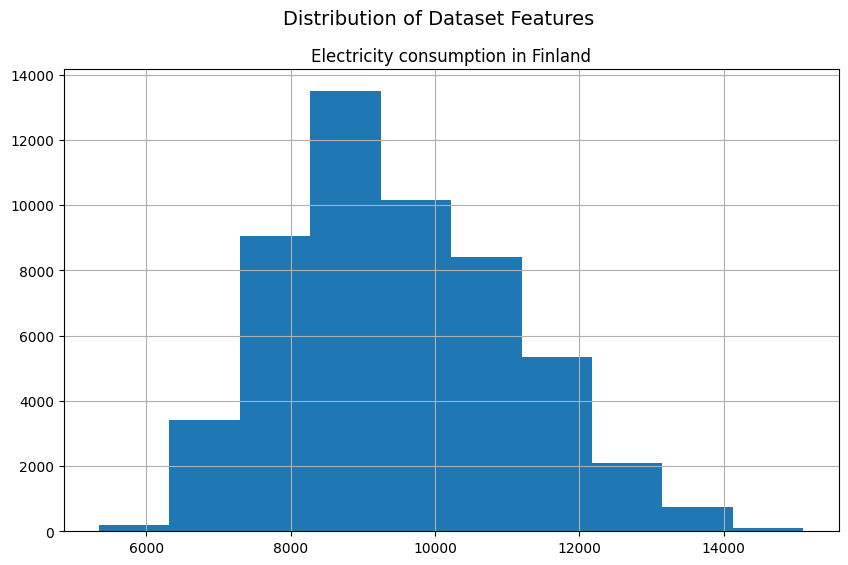

In [8]:
#histogram of numerical feature
df.hist(figsize=(10,6))
plt.suptitle("Distribution of Dataset Features", fontsize=14)
plt.show()

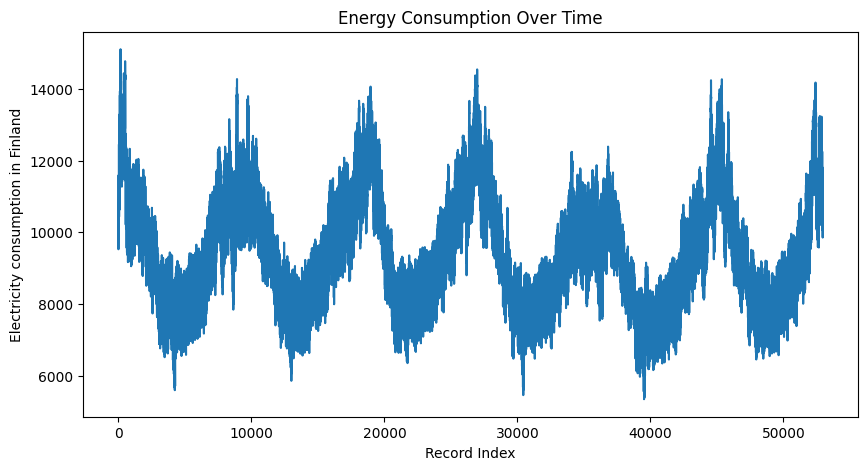

In [28]:
if "Electricity consumption in Finland" in df.columns:
    df["Electricity consumption in Finland"].plot(kind="line", figsize=(10,5), title="Energy Consumption Over Time")
    plt.ylabel("Electricity consumption in Finland")
    plt.xlabel("Record Index")
    plt.show()

## Feature Extraction


In [11]:
print("Original columns:", df.columns.tolist())


Original columns: ['Start time UTC', 'End time UTC', 'Start time UTC+03:00', 'End time UTC+03:00', 'Electricity consumption in Finland']


In [13]:
# Example 1: Drop irrelevant columns (if there are IDs or unnamed columns)
if "ID" in df.columns:
    df = df.drop("ID", axis=1)


since we are dealing with time series data we should edite the index from 1 2 3 ... --> DateTime format.

In [14]:
# Example 2: Extract features from Date/Time if available
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["DayOfWeek"] = df["Date"].dt.dayofweek
    print("\nExtracted features from Date column.")

In [27]:
# Example 3: Handle categorical data (convert text → numbers)
for col in df.select_dtypes(include="object").columns:
    if col != "Electricity consumption in Finland":  # keep target as is
        df[col] = df[col].astype("category").cat.codes
        print(f"Converted {col} to numeric codes.")

In [16]:
# Example 4: Check final features
print("\nFinal dataset after feature extraction:")
print(df.head())



Final dataset after feature extraction:
   Start time UTC  End time UTC  Start time UTC+03:00  End time UTC+03:00  \
0               0             0                     0                   0   
1               1             1                     1                   1   
2               2             2                     2                   2   
3               3             3                     3                   3   
4               4             4                     4                   4   

   Electricity consumption in Finland  
0                             10800.0  
1                             10431.0  
2                             10005.0  
3                              9722.0  
4                              9599.0  


In [17]:
# Save processed dataset for next steps
df.to_csv("processed_energy_data.csv", index=False)
print("\nProcessed dataset saved as processed_energy_data.csv")


Processed dataset saved as processed_energy_data.csv


## Linear Regression Model Training

In [26]:
X = df.drop("Electricity consumption in Finland", axis=1)
y = df["Electricity consumption in Finland"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make Predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluate the Model
print("✅ Model Training Completed")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

✅ Model Training Completed
Mean Squared Error (MSE): 2498411.8967205933
R² Score: 0.005887072031777407
